# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Za jedinečný identifikátor zastávky můžete považovat **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek můžete uvažovat, že se jedná o jednu a tutéž stanici (v mnoha případech to i platí). 

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [199]:
# a teď už je to na vás 💪
# níže vložte své řešení
import pandas as pd
import networkx as nx
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from pyvis.network import Network

# Příprava dat a vytvoření hlavního grafu

Načteme oba soubory a podíváme se, s čím budeme pracovat.

In [200]:
pid_df = pd.read_csv("d.csv")
stops_df = pd.read_csv("stops.txt")
print("PID dataframe:")
display(pid_df.head())
display(pid_df.info())
print("Stops dataframe:")
display(stops_df.head())
display(stops_df.info())

PID dataframe:


,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


None

Stops dataframe:


,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
0,U50S1,Budějovická,50.044411,14.448787,P,NaN,1,NaN,1,NaN,NaN,50.0,NaN
1,U52S1,Chodov,50.031672,14.490961,P,NaN,1,NaN,1,NaN,NaN,52.0,NaN
2,U75S1,Kolbenova,50.110395,14.516398,P,NaN,1,NaN,1,NaN,NaN,75.0,NaN
3,U78S1,Ládví,50.126591,14.469451,P,NaN,1,NaN,1,NaN,NaN,78.0,NaN
4,U100S1,Vltavská,50.100298,14.438492,P,NaN,1,NaN,1,NaN,NaN,100.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              16435 non-null  object 
 1   stop_name            15936 non-null  object 
 2   stop_lat             16435 non-null  float64
 3   stop_lon             16435 non-null  float64
 4   zone_id              15408 non-null  object 
 5   stop_url             0 non-null      float64
 6   location_type        16435 non-null  int64  
 7   parent_station       954 non-null    object 
 8   wheelchair_boarding  16435 non-null  int64  
 9   level_id             954 non-null    object 
 10  platform_code        14750 non-null  object 
 11  asw_node_id          15748 non-null  float64
 12  asw_stop_id          15354 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.6+ MB


None

Naformátujeme nesprávné časy ve sloupcích 'depart_from' a 'arrive_to' v 'pid_df'

In [201]:
def adjust_time(date_time_str):
    hour, minute, second = [int(x) for x in date_time_str.split(":")]
    if hour >= 24:
        hour %= 24
    return f'{hour}:{minute}:{second}'

pid_df['depart_from'] = pid_df['depart_from'].apply(adjust_time)
pid_df['arrive_to'] = pid_df['arrive_to'].apply(adjust_time)
pid_df['depart_from'] = pd.to_datetime(pid_df['depart_from'], format='%H:%M:%S')
pid_df['arrive_to'] = pd.to_datetime(pid_df['arrive_to'], format='%H:%M:%S')
pid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   stop_from       1642433 non-null  object        
 1   stop_from_name  1642433 non-null  object        
 2   stop_to         1642433 non-null  object        
 3   stop_to_name    1642433 non-null  object        
 4   depart_from     1642433 non-null  datetime64[ns]
 5   arrive_to       1642433 non-null  datetime64[ns]
 6   route_type      1642433 non-null  int64         
 7   is_night        1642433 non-null  int64         
 8   monday          1642433 non-null  int64         
 9   tuesday         1642433 non-null  int64         
 10  wednesday       1642433 non-null  int64         
 11  thursday        1642433 non-null  int64         
 12  friday          1642433 non-null  int64         
 13  saturday        1642433 non-null  int64         
 14  sunday          16

Budeme pracovat pouze s tramvajovými trasami, protože mají optimální množství dat. Vytvoříme hlavní graf, jehož vrcholy budou určeny na základě dat ze souboru 'stops.txt' (průměrné souřadnice). Hrany grafu budou spojovat dvojice zastávek, mezi kterými existuje alespoň jeden záznam v souboru 'd.csv'

In [202]:
trams_df = pid_df[pid_df['route_type'] == 0].copy()
trams_df['weight'] = trams_df[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum(axis=1)
trams_stops_df = stops_df[stops_df['stop_id'].isin(trams_df['stop_from']) | stops_df['stop_id'].isin(trams_df['stop_to'])]
trams_unique_stop_df = trams_stops_df.groupby('stop_name').agg({'stop_lon': 'median', 'stop_lat': 'median'}).reset_index()

display(trams_df.head())
display(trams_unique_stop_df.head())

G = nx.Graph()

for tram_stop_row in trams_unique_stop_df.itertuples():
    G.add_node(tram_stop_row.stop_name, coordinates=(tram_stop_row.stop_lon, tram_stop_row.stop_lat))

for tram_row in trams_df.itertuples():
    G.add_edge(tram_row.stop_from_name, tram_row.stop_to_name)

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday,weight
35575,U865Z2P,Vozovna Motol,U394Z2P,Motol,1900-01-01 06:07:00,1900-01-01 06:08:00,0,0,1,1,1,1,1,0,0,5
35576,U394Z2P,Motol,U395Z2P,Krematorium Motol,1900-01-01 06:08:00,1900-01-01 06:09:00,0,0,1,1,1,1,1,0,0,5
35577,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,1900-01-01 06:09:00,1900-01-01 06:10:00,0,0,1,1,1,1,1,0,0,5
35578,U113Z2P,Hlušičkova,U236Z2P,Slánská,1900-01-01 06:10:00,1900-01-01 06:12:00,0,0,1,1,1,1,1,0,0,5
35579,U236Z2P,Slánská,U47Z2P,Blatiny,1900-01-01 06:12:00,1900-01-01 06:13:00,0,0,1,1,1,1,1,0,0,5


,stop_name,stop_lon,stop_lat
0,Albertov,14.420451,50.067822
1,Anděl,14.403928,50.071867
2,Arbesovo náměstí,14.404089,50.076067
3,Arena Libeň jih,14.494592,50.102892
4,Balabenka,14.482804,50.104343


Pro vizualizaci grafu použijeme knihovnu 'pyvis', která umožňuje vytvářet interaktivní vizualizace grafů

In [203]:
coordinates = nx.get_node_attributes(G, 'coordinates')
min_x = min(coord[0] for coord in coordinates.values())
max_x = max(coord[0] for coord in coordinates.values())
min_y = min(coord[1] for coord in coordinates.values())
max_y = max(coord[1] for coord in coordinates.values())

coordinates = {
    node: (
        (coord[0] - min_x) / (max_x - min_x) * 7000,
        (coord[1] - min_y) / (max_y - min_y) * -7000
    )
    for node, coord in coordinates.items()
}

net1 = Network(notebook=True, height="500px", width="100%")

for node, (x, y) in coordinates.items():
    net1.add_node(node, label=node, title=f"Node: {node}", x=x, y=y, fixed=True)

for u, v, data in G.edges(data=True):
    net1.add_edge(u, v)

net1.set_options("""
{
  "physics": {
    "enabled": false
  },
  "interaction": {
    "zoomView": true,
    "dragView": true
  },
  "layout": {
    "improvedLayout": true
  }
}
""")

net1.show("graph.html")

html_title = "<h1 style='text-align: center;'>Graph representation of the PID Tram System</h1>"
html_with_title = f"{html_title}<iframe src='graph.html' width='100%' height='500px' style='border:none;'></iframe>"

display(HTML(html_with_title))


graph.html


## Kontrola grafu na souvislost

Ověříme, zda je námi vytvořený graf souvislý, což může být důležité pro některé geometrické metriky

In [204]:
if not nx.is_connected(G):
    print('Graf není souvislý')
else:
    print('Graph je souvuslý')

Graph je souvuslý


# Centrality

## Degree Centrality

Nejprve použijeme míru centrality podle stupně, která ukazuje, jak důležitý je konkrétní vrchol z hlediska počtu spojení s ostatními vrcholy v síti

In [205]:
degree_centrality = nx.degree_centrality(G)

top_5_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print(top_5_nodes)

[('Karlovo náměstí', 0.02857142857142857), ('Malostranská', 0.024999999999999998), ('Náměstí Bratří Synků', 0.02142857142857143), ('Národní divadlo', 0.02142857142857143), ('Otakarova', 0.02142857142857143)]


Výsledky ukazují, že zastávka "Karlovo náměstí" je nejvýznamnější v dopravní síti, protože má největší počet přímých spojení s ostatními zastávkami. Následují zastávky "Malostranská" a "Náměstí Bratří Synků", což může naznačovat jejich důležitost jako přestupních uzlů.

## Eigenvector Centrality

Výhodou této metriky je, že na rozdíl od Degree Centrality zohledňuje "vlivnost" samotných sousedních uzlů. Jinými slovy, pokud jsou sousedi uzlu vlivní, stává se vlivnějším i tento uzel

In [206]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
top_5_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_nodes)

[('Karlovo náměstí', 0.48166289186796674), ('Národní třída', 0.3840695409695818), ('Lazarská', 0.363687823249621), ('Myslíkova', 0.3280723404573743), ('Novoměstská radnice', 0.2850830043520858)]


Všimněme si, že "Karlovo náměstí" zůstává nejdůležitější zastávkou v síti. Zastávky "Národní třída" a "Lazarská" zaujímají druhé a třetí místo, což naznačuje jejich umístění na klíčových místech sítě propojených s dalšími významnými uzly. To potvrzuje jejich důležitost nejen jako přestupních bodů, ale také jako kritických míst pro celou strukturu sítě.

## Closeness Centrality

Pro rozmanitější analýzu tentokrát použijeme geometrickou metriku, která je založena na nejkratších cestách v grafu. Smysl této metriky spočívá v tom, že čím kratší jsou vzdálenosti od konkrétního vrcholu k ostatním vrcholům grafu, tím vyšší bude hodnota centrality pro tento vrchol. Je důležité ověřit souvislost grafu, abychom se vyhnuli nesprávné interpretaci izolovaných komponent, což jsme již provedli výše

In [207]:
closeness_centrality = nx.closeness_centrality(G)

top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_closeness)

[('Malostranská', 0.09978617248752673), ('Národní divadlo', 0.09887005649717515), ('Staroměstská', 0.09855684618092221), ('Čechův most', 0.09828009828009827), ('Právnická fakulta', 0.09810791871058164)]


Výsledky Closeness Centrality ukazují, že zastávka "Malostranská" je nejcentrálnější v síti, protože má nejmenší průměrnou vzdálenost ke všem ostatním uzlům. To poukazuje na její strategické umístění v dopravní síti, odkud je snadné se dostat k většině zastávek. Zastávky "Národní divadlo", "Staroměstská" a "Čechův most" se také umisťují na vysokých pozicích, což naznačuje, že se nacházejí na klíčových místech s dobrou dostupností pro cestující


## Vizualizace Degree Centrality

graph_degree_centrality.html


None

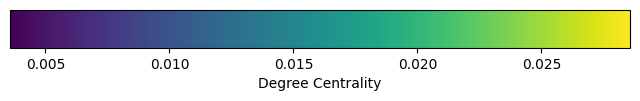

In [208]:
degree_centrality = nx.degree_centrality(G)

norm = colors.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
colormap = plt.get_cmap("viridis", 7)

net2 = Network(notebook=True, height="500px", width="100%")

for node, (x, y) in coordinates.items():
    centrality = degree_centrality[node]
    color = colors.to_hex(colormap(norm(centrality)))
    net2.add_node(node, label=node, title=f"Node: {node}, Degree Centrality: {centrality:.4f}", x=x, y=y, color=color, fixed=True)

for u, v, data in G.edges(data=True):
    net2.add_edge(u, v)

net2.set_options("""
{
  "physics": {
    "enabled": false
  },
  "interaction": {
    "zoomView": true,
    "dragView": true
  },
  "layout": {
    "improvedLayout": true
  }
}
""")

net2.show("graph_degree_centrality.html")

html_title = "<h1 style='text-align: center;'>Color Visualization of Degree Centrality for Tram Stops</h1>"
html_with_title = f"{html_title}<iframe src='graph_degree_centrality.html' width='100%' height='500px' style='border:none;'></iframe>"

display(HTML(html_with_title))


fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.get_cmap("viridis")
norm = colors.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))

cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
    orientation="horizontal"
)
display(cbar.set_label("Degree Centrality"))

plt.show()

Tento graf ukazuje, že nejdůležitější zastávky sítě z hlediska dané metriky se nacházejí v centru města. Zastávky, které mají stejné názvy, ale fyzicky se nacházejí na různých místech (Strossmayerovo náměstí, Anděl, Karlovo náměstí), mají také vyšší hodnotu Degree Centrality

# Vlastní otázky

## 1) Jaké je průměrné rozložení času potřebného k překonání vzdálenosti mezi sousedními zastávkami?

Pro tento účel spočítáme čas mezi sloupci 'arrive_to' a 'depart_from' a vypočítáme průměr pro každou unikátní dvojici zastávek (dvojice A-B a B-A považujeme za stejné).

In [209]:
trams_df['interval'] = (trams_df['arrive_to'] - trams_df['depart_from']).dt.total_seconds().abs() / 60

trams_df['stops_pair'] = trams_df.apply(lambda row: '&'.join(sorted([row['stop_from_name'], row['stop_to_name']])), axis=1)

display(trams_df['stops_pair'].head())

average_intervals = trams_df.groupby('stops_pair')['interval'].mean().reset_index()

average_intervals.columns = ['stop_pair', 'average_interval']

display(average_intervals.head())

new_edge_data = {
    tuple(row['stop_pair'].split('&')): {'interval': row['average_interval']}
    for _, row in average_intervals.iterrows()
}

nx.set_edge_attributes(G, new_edge_data)


35575             Motol&Vozovna Motol
35576         Krematorium Motol&Motol
35577    Hlušičkova&Krematorium Motol
35578              Hlušičkova&Slánská
35579                 Blatiny&Slánská
Name: stops_pair, dtype: object

,stop_pair,average_interval
0,Albertov&Botanická zahrada,1.000000
1,Albertov&Ostrčilovo náměstí,2.218644
2,Albertov&Výtoň,7.032807
3,Anděl&Arbesovo náměstí,3.434876
4,Anděl&Bertramka,5.786035


Nyní použijeme barevnou mapu pro zbarvení hran našeho výchozího grafu

graph_intervals.html


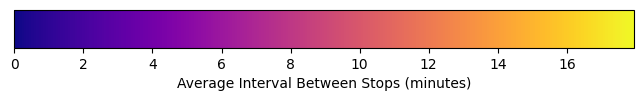

None

In [210]:
edge_intervals = nx.get_edge_attributes(G, 'interval')
edge_norm = colors.Normalize(vmin=min(edge_intervals.values()), vmax=max(edge_intervals.values()))
edge_colormap = plt.get_cmap("plasma")

net3 = Network(notebook=True, height="500px", width="100%")

for node, (x, y) in coordinates.items():
    net3.add_node(node, label=node, title=f"Node: {node}", x=x, y=y, fixed=True)

for u, v, data in G.edges(data=True):
    interval = data.get('interval', 0)
    edge_color = colors.to_hex(edge_colormap(edge_norm(interval)))
    net3.add_edge(u, v, title=f"Average Interval: {interval:.2f} min", color=edge_color, value=0.8)

net3.set_options("""
{
  "physics": {
    "enabled": false
  },
  "interaction": {
    "zoomView": true,
    "dragView": true
  },
  "layout": {
    "improvedLayout": true
  }
}
""")

net3.show("graph_intervals.html")

html_title = "<h1 style='text-align: center;'>Average Time intervals between Tram Stops</h1>"
html_with_title = f"{html_title}<iframe src='graph_intervals.html' width='100%' height='500px' style='border:none;'></iframe>"

display(HTML(html_with_title))

fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=edge_norm, cmap=edge_colormap),
    cax=ax,
    orientation="horizontal"
)
cbar.set_label("Average Interval Between Stops (minutes)")
display(plt.show())

Z grafu je patrné, že nejkratší intervaly jsou v průměru v centru města, což lze vysvětlit vyšší hustotou rozmístění zastávek. Lze si také všimnout hran, které se zřetelně odlišují barvou, například Dejvická-Lotyšská nebo Anděl-Křižová, což může být způsobeno nepřesnostmi v původních datech

## 2) Které zastávky hrají klíčovou roli pro propojení dopravní sítě?

Pro odpověď na tuto otázku použijeme metriku Betweenness Centrality, která ukazuje, jak často se uzel (v tomto případě zastávka) nachází na nejkratší cestě mezi jinými uzly. V kontextu dopravní sítě tato metrika odráží důležitost uzlu pro propojení sítě, spojující různé části sítě. Můžeme říci, že takové uzly zajišťují klíčové trasy pro pohyb mezi vzdálenými oblastmi, a jejich odstranění by mohlo výrazně narušit celkovou propojenost sítě.

graph_connections.html


None

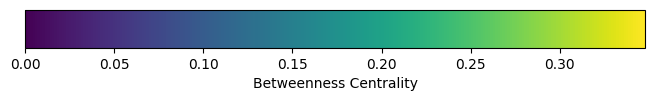

In [211]:
betweenness_centrality = nx.betweenness_centrality(G)

norm = colors.Normalize(vmin=min(betweenness_centrality.values()), vmax=max(betweenness_centrality.values()))
colormap = plt.get_cmap("viridis", 7)

net4 = Network(notebook=True, height="500px", width="100%")

for node, (x, y) in coordinates.items():
    centrality = betweenness_centrality[node]
    color = colors.to_hex(colormap(norm(centrality)))
    net4.add_node(node, label=node, title=f"Node: {node}, Betweenness Centrality: {centrality:.4f}", x=x, y=y, color=color, fixed=True)

for u, v, data in G.edges(data=True):
    net4.add_edge(u, v, title=f"Weight: {data.get('weight', 1)}")

net4.set_options("""
{
  "physics": {
    "enabled": false
  },
  "interaction": {
    "zoomView": true,
    "dragView": true
  },
  "layout": {
    "improvedLayout": true
  }
}
""")

net4.show("graph_connections.html")

html_title = "<h1 style='text-align: center;'>Key Stops for Network Connectivity in the Tram System</h1>"
html_with_title = f"{html_title}<iframe src='graph_connections.html' width='100%' height='500px' style='border:none;'></iframe>"

display(HTML(html_with_title))

fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.get_cmap("viridis")
norm = colors.Normalize(vmin=min(betweenness_centrality.values()), vmax=max(betweenness_centrality.values()))

cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
    orientation="horizontal"
)
display(cbar.set_label("Betweenness Centrality"))

plt.show()

Vidíme, že nejdůležitější zastávky pro podporu celé sítě se nacházejí v centru města, což je zcela logické. Vysoký význam má také Anděl a zastávky v jeho okolí. Z dalších můžeme zmínit například Strossmayerovo náměstí, což mohu osobně potvrdit, protože přes něj každý den jezdím do školy :)

## 3) Které dvojice zastávek jsou o víkendech nejvytíženější?

Pro tento účel spočítáme součet všech spojů aktivních v sobotu a neděli pro každou unikátní dvojici zastávek (podobně jako u první otázky)

In [212]:
trams_df['weekend_rides'] = trams_df['saturday'] + trams_df['sunday']

popular_routes_weekend = trams_df.groupby('stops_pair')['weekend_rides'].sum().reset_index()

popular_routes_weekend.columns = ['stop_pair', 'total_weekend_rides']

popular_routes_weekend = popular_routes_weekend.sort_values(by='total_weekend_rides', ascending=False)

popular_routes_weekend.columns = ['stop_pair', 'weekend_rides']

display(popular_routes_weekend.head())

new_edge_data = {
    tuple(row['stop_pair'].split('&')): {'weekend_rides': row['weekend_rides']}
    for _, row in popular_routes_weekend.iterrows()
}

nx.set_edge_attributes(G, new_edge_data)


,stop_pair,weekend_rides
189,Královský letohrádek&Pražský hrad,2569
350,Vodičkova&Václavské náměstí,2168
201,Lazarská&Vodičkova,2168
142,Jindřišská&Václavské náměstí,2168
21,Biskupcova&Ohrada,1954


graph_total_weekends.html


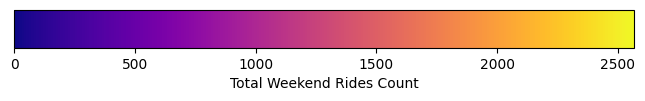

None

In [213]:
edge_weekend_rides = nx.get_edge_attributes(G, 'weekend_rides')
edge_norm = colors.Normalize(vmin=min(edge_intervals.values()), vmax=max(edge_weekend_rides.values()))
edge_colormap = plt.get_cmap("plasma")

net5 = Network(notebook=True, height="500px", width="100%")

for node, (x, y) in coordinates.items():
    net5.add_node(node, label=node, title=f"Node: {node}", x=x, y=y, fixed=True)

for u, v, data in G.edges(data=True):
    total_weekend_rides = data.get('weekend_rides', 0)
    edge_color = colors.to_hex(edge_colormap(edge_norm(total_weekend_rides)))
    net5.add_edge(u, v, title=f"Total Weekend Rides: {total_weekend_rides}", color=edge_color, value=0.8)

net5.set_options("""
{
  "physics": {
    "enabled": false
  },
  "interaction": {
    "zoomView": true,
    "dragView": true
  },
  "layout": {
    "improvedLayout": true
  }
}
""")

net5.show("graph_total_weekends.html")

html_title = "<h1 style='text-align: center;'>Most Heavily Used Tram Stop Pairs on Weekends</h1>"
html_with_title = f"{html_title}<iframe src='graph_total_weekends.html' width='100%' height='500px' style='border:none;'></iframe>"

display(HTML(html_with_title))

fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=edge_norm, cmap=edge_colormap),
    cax=ax,
    orientation="horizontal"
)
cbar.set_label("Total Weekend Rides Count")
display(plt.show())

Vidíme, že o víkendech funguje tramvajová doprava nejintenzivněji v centru města, což může souviset jak s velkým počtem tras procházejících přes zastávky, tak s intervaly mezi tramvajemi na jedné trase.